In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.grid"] = True

In [2]:
df = pd.read_csv("/home/priangshu/flashattention-benchmark/results/raw/seq_len_sweep.csv")
df

,backend,batch_size,seq_len,embed_dim,num_heads,Causal,dtype,time_ms,tokens_per_sec,mem_alloc_mb,mem_reserved_mb
0,naive,2,128,512,8,True,torch.float32,0.682348,3.751750e+05,17.644531,30.0
1,naive,2,256,512,8,True,torch.float32,1.248154,4.102059e+05,27.191406,34.0
2,naive,2,512,512,8,True,torch.float32,1.327329,7.714740e+05,58.378906,62.0
3,naive,2,1024,512,8,True,torch.float32,5.162394,3.967152e+05,169.128906,176.0
4,naive,2,2048,512,8,True,torch.float32,18.430464,2.222407e+05,584.128906,598.0
5,naive,2,4096,512,8,True,torch.float32,70.897236,1.155475e+05,2188.128906,2202.0
6,sdpa,2,128,512,8,True,torch.float32,0.434668,5.889559e+05,16.128906,30.0
7,sdpa,2,256,512,8,True,torch.float32,0.510649,1.002646e+06,20.128906,34.0
8,sdpa,2,512,512,8,True,torch.float32,0.578109,1.771291e+06,28.128906,46.0
9,sdpa,2,1024,512,8,True,torch.float32,1.777377,1.152260e+06,44.128906,66.0


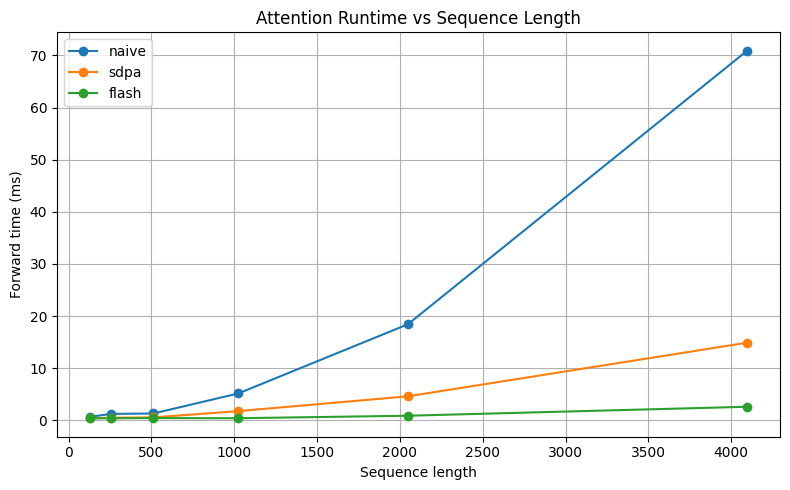

In [3]:
# Plot 1 - Runtime vs Sequence Length
for backend in df["backend"].unique():
    subset = df[df["backend"] == backend]
    plt.plot(
        subset["seq_len"],
        subset["time_ms"],
        marker="o",
        label=backend,
    )

plt.xlabel("Sequence length")
plt.ylabel("Forward time (ms)")
plt.title("Attention Runtime vs Sequence Length")
plt.legend()
plt.tight_layout()
plt.savefig("../results/plots/runtime_vs_seq_len.png")
plt.show()

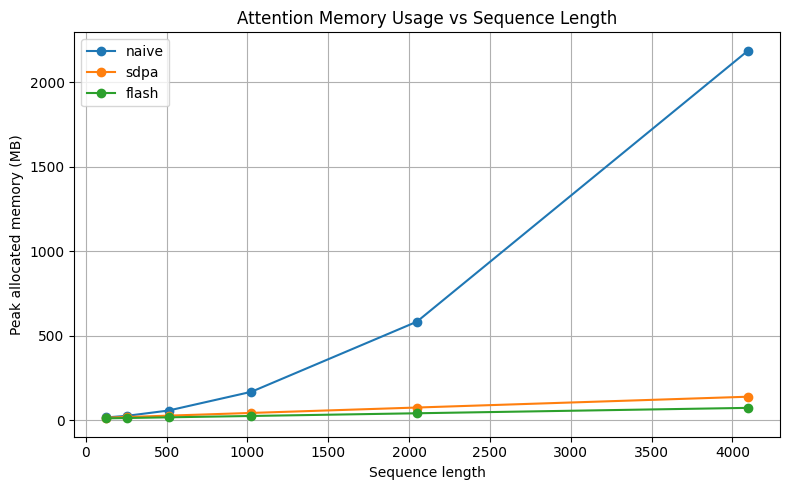

In [ ]:
# Plot 2 - Memory Usage vs Sequence Length
for backend in df["backend"].unique():
    subset = df[df["backend"] == backend]
    plt.plot(
        subset["seq_len"],
        subset["mem_alloc_mb"],
        marker="o",
        label=backend,
    )

plt.xlabel("Sequence length")
plt.ylabel("Peak allocated memory (MB)")
plt.title("Attention Memory Usage vs Sequence Length")
plt.legend()
plt.tight_layout()
plt.savefig("../results/plots/memory_vs_seq_len.png")
plt.show()

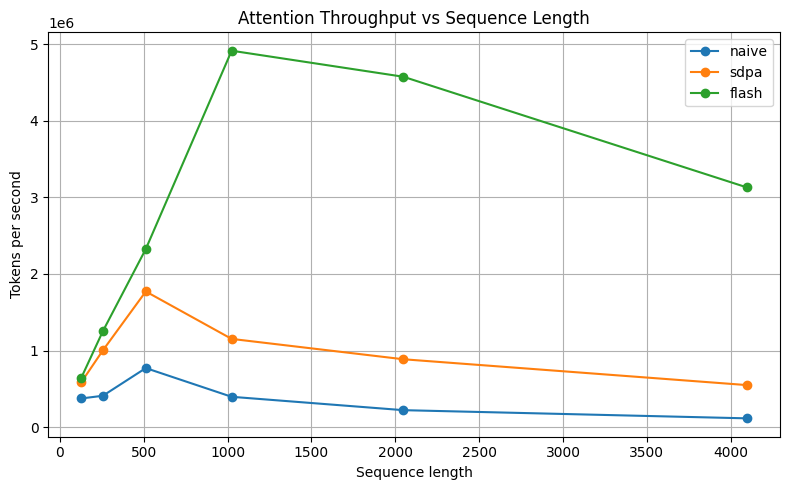

In [5]:
# Plot 3 - Throughput (tokens/sec)
for backend in df["backend"].unique():
    subset = df[df["backend"] == backend]
    plt.plot(
        subset["seq_len"],
        subset["tokens_per_sec"],
        marker="o",
        label=backend,
    )

plt.xlabel("Sequence length")
plt.ylabel("Tokens per second")
plt.title("Attention Throughput vs Sequence Length")
plt.legend()
plt.tight_layout()
plt.savefig("../results/plots/throughput_vs_seq_len.png")
plt.show()